In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)


In [30]:
# Read the dataset
print("Loading dataset...")
df = pd.read_csv('synthetic_fraud_dataset.csv')

# ====================================
# 1. BASIC INFORMATION ABOUT THE DATASET
# ====================================
print("\n" + "="*50)
print("BASIC DATASET INFORMATION")
print("="*50)
print(f"Dataset Shape: {df.shape[0]} rows x {df.shape[1]} columns")
print(f"\nTarget Variable: Fraud_Label (0 = Normal, 1 = Fraud)")
print(f"\nExplanatory Variables: All other columns except Transaction_ID and Fraud_Label")

# Display column data types
print("\nColumn Data Types:")
for col, dtype in df.dtypes.items():
    print(f"  - {col}: {dtype}")



Loading dataset...

BASIC DATASET INFORMATION
Dataset Shape: 50000 rows x 21 columns

Target Variable: Fraud_Label (0 = Normal, 1 = Fraud)

Explanatory Variables: All other columns except Transaction_ID and Fraud_Label

Column Data Types:
  - Transaction_ID: object
  - User_ID: object
  - Transaction_Amount: float64
  - Transaction_Type: object
  - Timestamp: object
  - Account_Balance: float64
  - Device_Type: object
  - Location: object
  - Merchant_Category: object
  - IP_Address_Flag: int64
  - Previous_Fraudulent_Activity: int64
  - Daily_Transaction_Count: int64
  - Avg_Transaction_Amount_7d: float64
  - Failed_Transaction_Count_7d: int64
  - Card_Type: object
  - Card_Age: int64
  - Transaction_Distance: float64
  - Authentication_Method: object
  - Risk_Score: float64
  - Is_Weekend: int64
  - Fraud_Label: int64


In [31]:


# ====================================
# 2. MISSING DATA ANALYSIS
# ====================================
print("\n" + "="*50)
print("MISSING DATA ANALYSIS")
print("="*50)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_data.sum() == 0:
    print("Good news: No missing data found in the dataset!")

    



MISSING DATA ANALYSIS
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []
Good news: No missing data found in the dataset!


In [32]:

# ====================================
# 3. DATA QUALITY CHECKS
# ====================================
print("\n" + "="*50)
print("DATA QUALITY CHECKS")
print("="*50)

# Check for duplicates
duplicate_transactions = df['Transaction_ID'].duplicated().sum()
print(f"\nDuplicate Transaction IDs: {duplicate_transactions}")

# Check for negative values where they shouldn't exist
negative_amount = (df['Transaction_Amount'] < 0).sum()
negative_balance = (df['Account_Balance'] < 0).sum()
print(f"\nNegative Transaction Amounts: {negative_amount}")
print(f"Negative Account Balances: {negative_balance}")

# Check date range
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(f"\nDate Range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")

# Check categorical variables for unusual values
print("\nUnique values in categorical columns:")
categorical_cols = ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 
                   'Card_Type', 'Authentication_Method']
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"  - {col}: {unique_vals} unique values")
    if unique_vals < 20:  # Only show values if there aren't too many
        print(f"    Values: {df[col].unique()}")





DATA QUALITY CHECKS

Duplicate Transaction IDs: 0

Negative Transaction Amounts: 0
Negative Account Balances: 0

Date Range: 2023-01-01 00:01:00 to 2023-12-31 23:50:00

Unique values in categorical columns:
  - Transaction_Type: 4 unique values
    Values: ['POS' 'Bank Transfer' 'Online' 'ATM Withdrawal']
  - Device_Type: 3 unique values
    Values: ['Laptop' 'Mobile' 'Tablet']
  - Location: 5 unique values
    Values: ['Sydney' 'New York' 'Mumbai' 'Tokyo' 'London']
  - Merchant_Category: 5 unique values
    Values: ['Travel' 'Clothing' 'Restaurants' 'Electronics' 'Groceries']
  - Card_Type: 4 unique values
    Values: ['Amex' 'Mastercard' 'Visa' 'Discover']
  - Authentication_Method: 4 unique values
    Values: ['Biometric' 'Password' 'OTP' 'PIN']


In [33]:

# ====================================
# 4. TARGET VARIABLE ANALYSIS
# ====================================
print("\n" + "="*50)
print("TARGET VARIABLE ANALYSIS (Fraud Distribution)")
print("="*50)

fraud_counts = df['Fraud_Label'].value_counts()
fraud_percentage = (fraud_counts / len(df)) * 100

print(f"\nFraud Distribution:")
print(f"  - Normal Transactions (0): {fraud_counts[0]} ({fraud_percentage[0]:.2f}%)")
print(f"  - Fraudulent Transactions (1): {fraud_counts[1]} ({fraud_percentage[1]:.2f}%)")
print(f"\nClass Imbalance Ratio: 1:{fraud_counts[0]/fraud_counts[1]:.1f}")




TARGET VARIABLE ANALYSIS (Fraud Distribution)

Fraud Distribution:
  - Normal Transactions (0): 33933 (67.87%)
  - Fraudulent Transactions (1): 16067 (32.13%)

Class Imbalance Ratio: 1:2.1


In [34]:


# ====================================
# 5. NUMERICAL FEATURES STATISTICS
# ====================================
print("\n" + "="*50)
print("NUMERICAL FEATURES STATISTICS")
print("="*50)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Fraud_Label')  # Remove target variable

# Basic statistics for numerical features
print("\nKey Statistics for Numerical Features:")
print(df[numerical_cols].describe())




NUMERICAL FEATURES STATISTICS

Key Statistics for Numerical Features:
       Transaction_Amount  Account_Balance  IP_Address_Flag  \
count            50000.00         50000.00         50000.00   
mean                99.41         50294.07             0.05   
std                 98.69         28760.46             0.22   
min                  0.00           500.48             0.00   
25%                 28.68         25355.99             0.00   
50%                 69.66         50384.43             0.00   
75%                138.85         75115.14             0.00   
max               1174.14         99998.31             1.00   

       Previous_Fraudulent_Activity  Daily_Transaction_Count  \
count                      50000.00                 50000.00   
mean                           0.10                     7.49   
std                            0.30                     4.04   
min                            0.00                     1.00   
25%                            0.00      

In [35]:
# ====================================
# 6. Outliers
# ====================================

outlier_cols_zscore = []

for column in df.select_dtypes(include=['number']).columns:
    z_scores = stats.zscore(df[column].dropna())  # Drop NaN values to avoid errors
    outliers = (abs(z_scores) > 3).sum()
    
    if outliers > 0:
        outlier_cols_zscore.append(column)
        print(f"Column '{column}' has {outliers} outliers.")

print("Columns with outliers (Z-score):", outlier_cols_zscore)

Column 'Transaction_Amount' has 920 outliers.
Column 'IP_Address_Flag' has 2510 outliers.
Column 'Previous_Fraudulent_Activity' has 4920 outliers.
Columns with outliers (Z-score): ['Transaction_Amount', 'IP_Address_Flag', 'Previous_Fraudulent_Activity']



GENERATING VISUALIZATIONS...


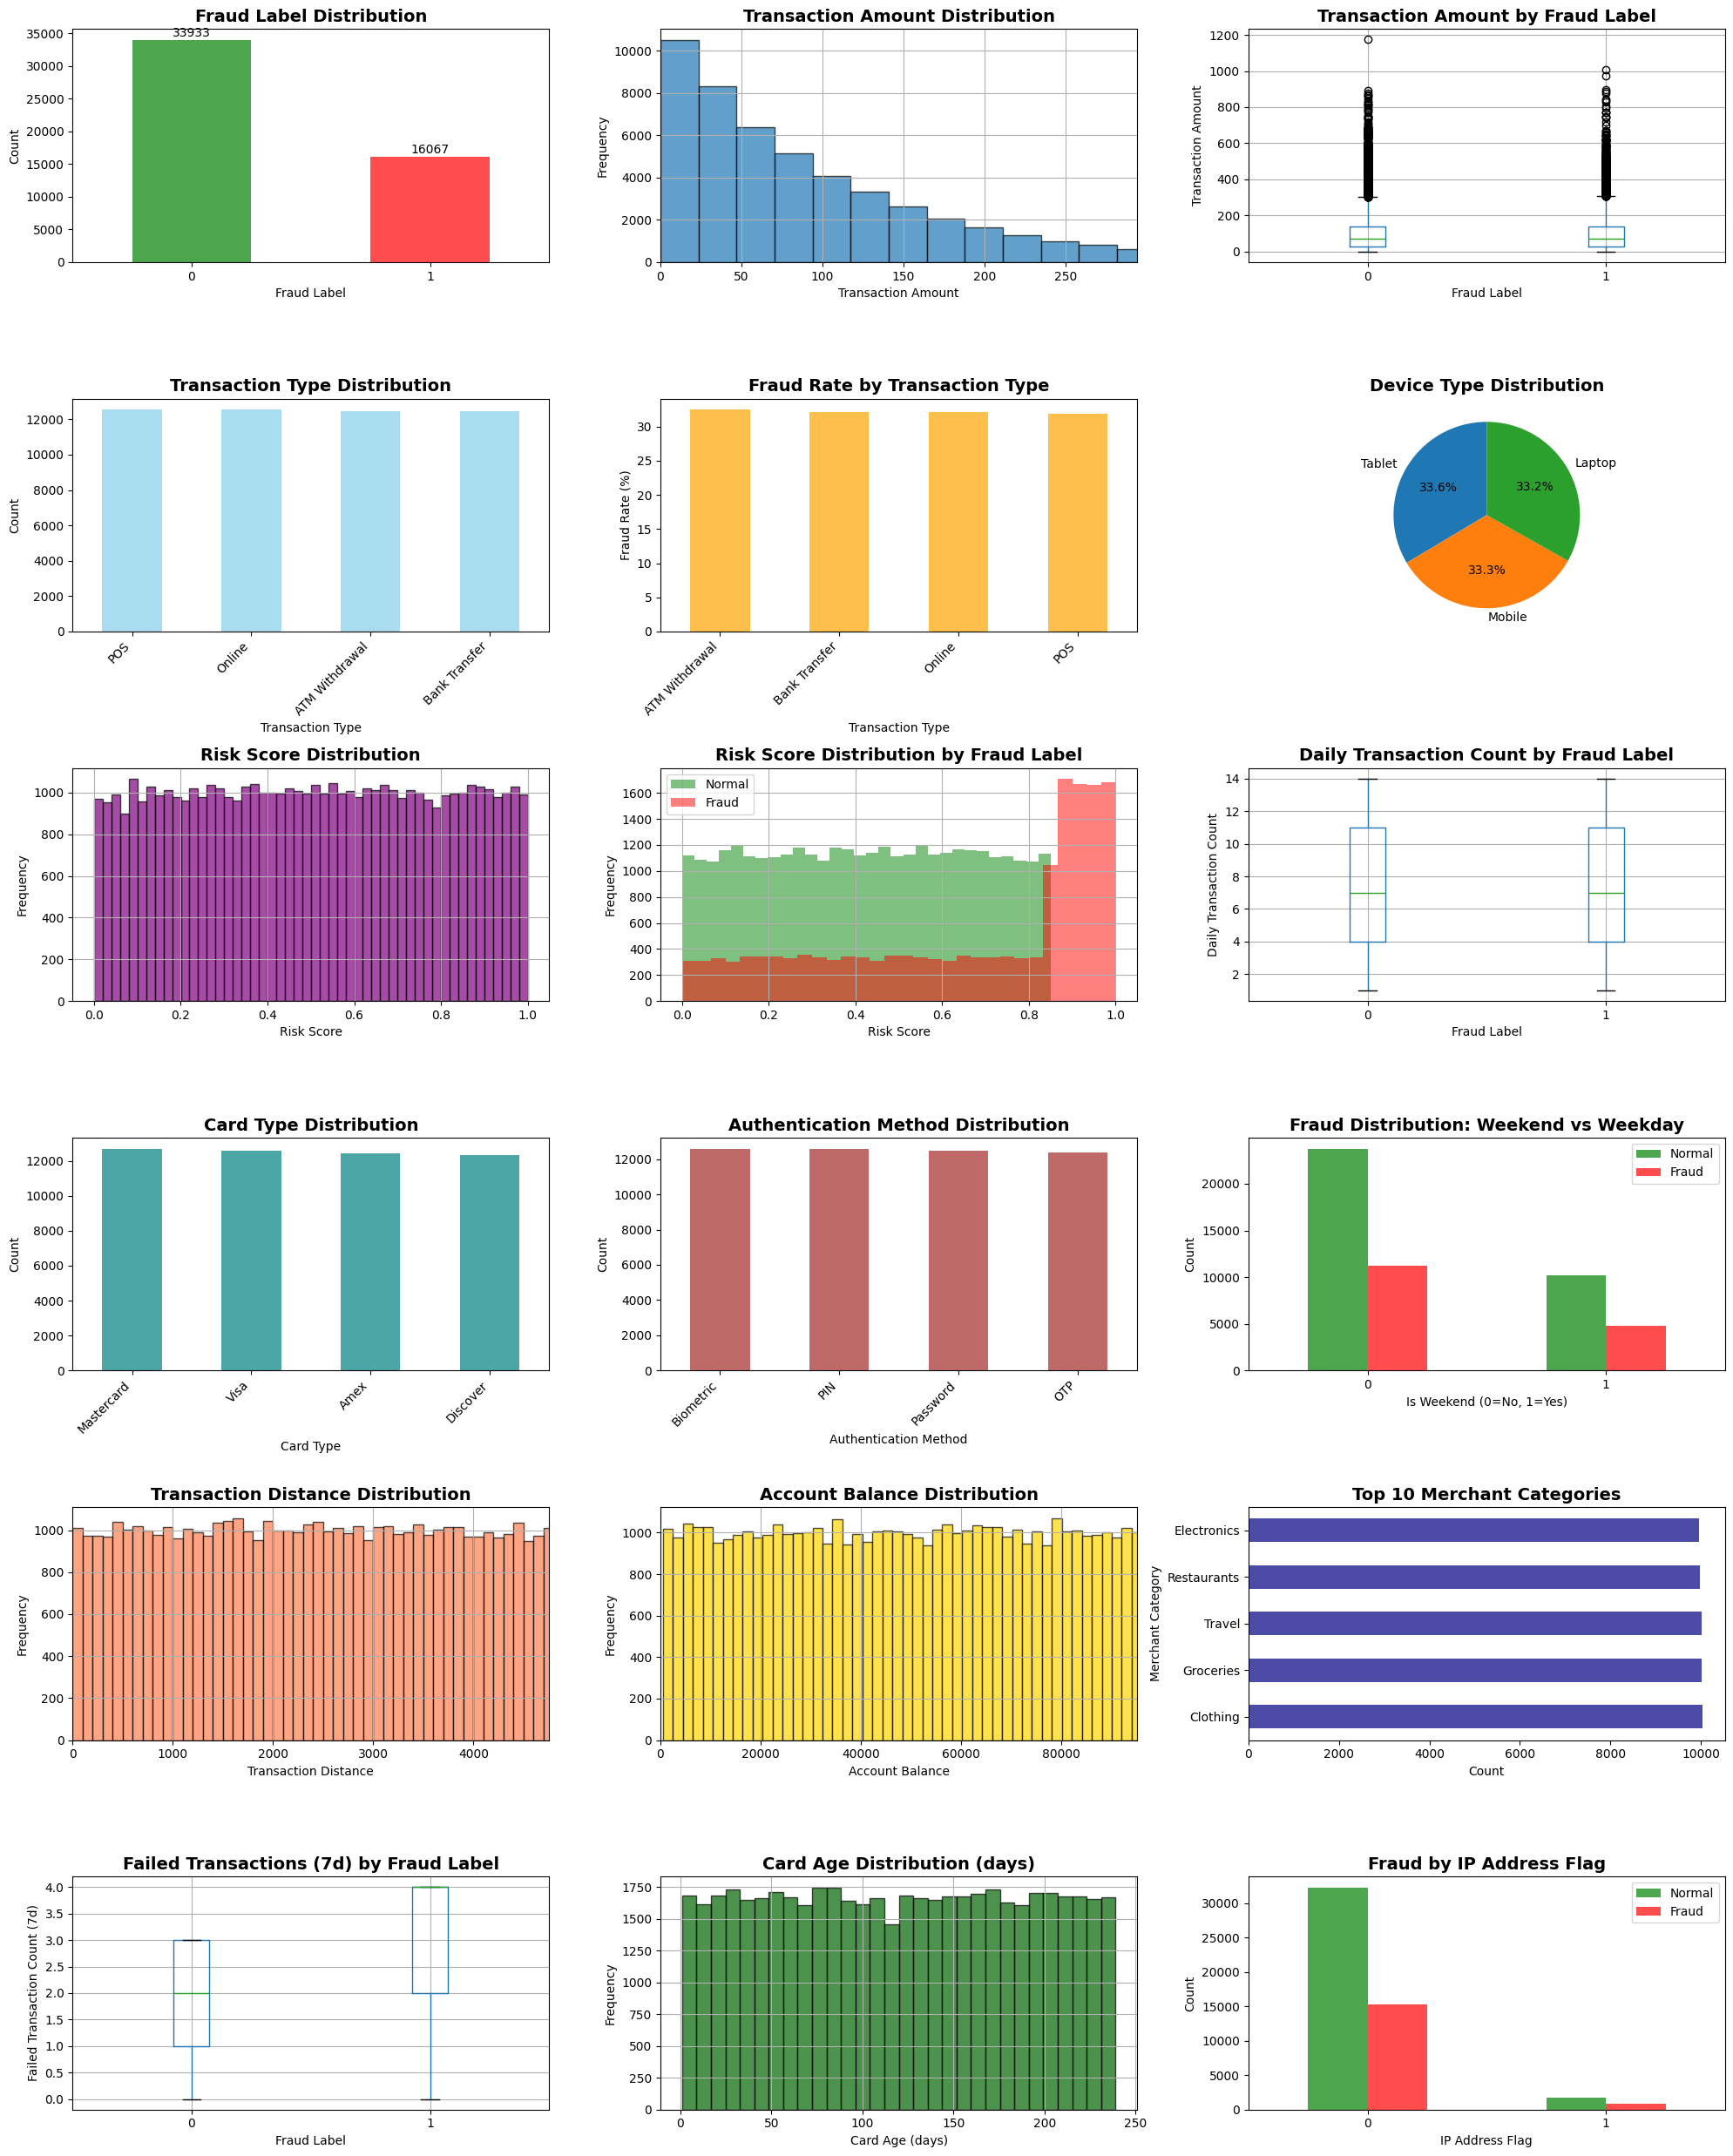

In [36]:


# ====================================
# 6. VISUALIZATIONS
# ====================================
print("\n" + "="*50)
print("GENERATING VISUALIZATIONS...")
print("="*50)

# Create figure with subplots
fig = plt.figure(figsize=(20, 25))

# 1. Fraud Distribution
ax1 = plt.subplot(6, 3, 1)
fraud_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Fraud Label Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(fraud_counts):
    plt.text(i, v + 100, str(v), ha='center', va='bottom')

# 2. Transaction Amount Distribution
ax2 = plt.subplot(6, 3, 2)
df['Transaction_Amount'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xlim(0, df['Transaction_Amount'].quantile(0.95))  # Limit to 95th percentile for better view

# 3. Transaction Amount by Fraud Label (Box Plot)
ax3 = plt.subplot(6, 3, 3)
df.boxplot(column='Transaction_Amount', by='Fraud_Label', ax=ax3)
plt.title('Transaction Amount by Fraud Label', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Fraud Label')
plt.ylabel('Transaction Amount')

# 4. Transaction Type Distribution
ax4 = plt.subplot(6, 3, 4)
transaction_type_counts = df['Transaction_Type'].value_counts()
transaction_type_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Transaction Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# 5. Fraud Rate by Transaction Type
ax5 = plt.subplot(6, 3, 5)
fraud_by_type = df.groupby('Transaction_Type')['Fraud_Label'].agg(['sum', 'count'])
fraud_by_type['fraud_rate'] = (fraud_by_type['sum'] / fraud_by_type['count']) * 100
fraud_by_type['fraud_rate'].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Fraud Rate by Transaction Type', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45, ha='right')

# 6. Device Type Distribution
ax6 = plt.subplot(6, 3, 6)
device_counts = df['Device_Type'].value_counts()
device_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Device Type Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')

# 7. Risk Score Distribution
ax7 = plt.subplot(6, 3, 7)
df['Risk_Score'].hist(bins=50, edgecolor='black', alpha=0.7, color='purple')
plt.title('Risk Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')

# 8. Risk Score by Fraud Label
ax8 = plt.subplot(6, 3, 8)
df[df['Fraud_Label']==0]['Risk_Score'].hist(bins=30, alpha=0.5, label='Normal', color='green')
df[df['Fraud_Label']==1]['Risk_Score'].hist(bins=30, alpha=0.5, label='Fraud', color='red')
plt.title('Risk Score Distribution by Fraud Label', fontsize=14, fontweight='bold')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.legend()

# 9. Daily Transaction Count Distribution
ax9 = plt.subplot(6, 3, 9)
df.boxplot(column='Daily_Transaction_Count', by='Fraud_Label', ax=ax9)
plt.title('Daily Transaction Count by Fraud Label', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Fraud Label')
plt.ylabel('Daily Transaction Count')

# 10. Card Type Distribution
ax10 = plt.subplot(6, 3, 10)
card_type_counts = df['Card_Type'].value_counts()
card_type_counts.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Card Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# 11. Authentication Method Distribution
ax11 = plt.subplot(6, 3, 11)
auth_counts = df['Authentication_Method'].value_counts()
auth_counts.plot(kind='bar', color='brown', alpha=0.7)
plt.title('Authentication Method Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Authentication Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# 12. Weekend vs Weekday Transactions
ax12 = plt.subplot(6, 3, 12)
weekend_fraud = df.groupby(['Is_Weekend', 'Fraud_Label']).size().unstack()
weekend_fraud.plot(kind='bar', stacked=False, ax=ax12, color=['green', 'red'], alpha=0.7)
plt.title('Fraud Distribution: Weekend vs Weekday', fontsize=14, fontweight='bold')
plt.xlabel('Is Weekend (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(['Normal', 'Fraud'])
plt.xticks(rotation=0)

# 13. Transaction Distance Analysis
ax13 = plt.subplot(6, 3, 13)
df['Transaction_Distance'].hist(bins=50, edgecolor='black', alpha=0.7, color='coral')
plt.title('Transaction Distance Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Distance')
plt.ylabel('Frequency')
plt.xlim(0, df['Transaction_Distance'].quantile(0.95))

# 14. Account Balance Distribution
ax14 = plt.subplot(6, 3, 14)
df['Account_Balance'].hist(bins=50, edgecolor='black', alpha=0.7, color='gold')
plt.title('Account Balance Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.xlim(0, df['Account_Balance'].quantile(0.95))

# 15. Merchant Category Analysis
ax15 = plt.subplot(6, 3, 15)
top_merchants = df['Merchant_Category'].value_counts().head(10)
top_merchants.plot(kind='barh', color='navy', alpha=0.7)
plt.title('Top 10 Merchant Categories', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Merchant Category')

# 16. Failed Transaction Count Analysis
ax16 = plt.subplot(6, 3, 16)
df.boxplot(column='Failed_Transaction_Count_7d', by='Fraud_Label', ax=ax16)
plt.title('Failed Transactions (7d) by Fraud Label', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Fraud Label')
plt.ylabel('Failed Transaction Count (7d)')

# 17. Card Age Analysis
ax17 = plt.subplot(6, 3, 17)
df['Card_Age'].hist(bins=30, edgecolor='black', alpha=0.7, color='darkgreen')
plt.title('Card Age Distribution (days)', fontsize=14, fontweight='bold')
plt.xlabel('Card Age (days)')
plt.ylabel('Frequency')

# 18. IP Address Flag Analysis
ax18 = plt.subplot(6, 3, 18)
ip_fraud = df.groupby(['IP_Address_Flag', 'Fraud_Label']).size().unstack()
ip_fraud.plot(kind='bar', ax=ax18, color=['green', 'red'], alpha=0.7)
plt.title('Fraud by IP Address Flag', fontsize=14, fontweight='bold')
plt.xlabel('IP Address Flag')
plt.ylabel('Count')
plt.legend(['Normal', 'Fraud'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('fraud_eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()



In [37]:
# Save individual plots as well

# 1. Fraud Distribution
fig, ax = plt.subplots(figsize=(6, 4))
max_val = fraud_counts.max()
fraud_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7, ax=ax)
ax.set_title('Fraud Label Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Fraud Label')
ax.set_ylabel('Count')
for i, v in enumerate(fraud_counts):
    ax.text(i, v + 100, str(v), ha='center', va='bottom')
    ax.set_ylim(0, max_val * 1.1)  # add headroom
plt.tight_layout()
plt.savefig('plot_01_fraud_distribution.png', dpi=300)
plt.close(fig)


In [38]:

# 2. Transaction Amount Distribution
fig, ax = plt.subplots(figsize=(6, 4))
df['Transaction_Amount'].hist(bins=50, edgecolor='black', alpha=0.7, ax=ax)
ax.set_title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Frequency')
ax.set_xlim(0, df['Transaction_Amount'].quantile(0.95))
plt.tight_layout()
plt.savefig('plot_02_transaction_amount.png', dpi=300)
plt.close(fig)

# 3. Transaction Amount by Fraud Label (Box Plot)
fig, ax = plt.subplots(figsize=(6, 4))
df.boxplot(column='Transaction_Amount', by='Fraud_Label', ax=ax)
ax.set_title('Transaction Amount by Fraud Label', fontsize=14, fontweight='bold')
plt.suptitle('')
ax.set_xlabel('Fraud Label')
ax.set_ylabel('Transaction Amount')
plt.tight_layout()
plt.savefig('plot_03_boxplot_transaction_amount.png', dpi=300)
plt.close(fig)

# 4. Transaction Type Distribution
fig, ax = plt.subplots(figsize=(6, 4))
transaction_type_counts = df['Transaction_Type'].value_counts()
transaction_type_counts.plot(kind='bar', color='skyblue', alpha=0.7, ax=ax)
ax.set_title('Transaction Type Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot_04_transaction_type.png', dpi=300)
plt.close(fig)

# 5. Fraud Rate by Transaction Type
fig, ax = plt.subplots(figsize=(6, 4))
fraud_by_type = df.groupby('Transaction_Type')['Fraud_Label'].agg(['sum', 'count'])
fraud_by_type['fraud_rate'] = (fraud_by_type['sum'] / fraud_by_type['count']) * 100
fraud_by_type['fraud_rate'].plot(kind='bar', color='orange', alpha=0.7, ax=ax)
ax.set_title('Fraud Rate by Transaction Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Fraud Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot_05_fraud_rate_by_type.png', dpi=300)
plt.close(fig)

# 6. Device Type Distribution
fig, ax = plt.subplots(figsize=(6, 4))
device_counts = df['Device_Type'].value_counts()
device_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
ax.set_title('Device Type Distribution', fontsize=14, fontweight='bold')
ax.set_ylabel('')
plt.tight_layout()
plt.savefig('plot_06_device_type_distribution.png', dpi=300)
plt.close(fig)

# 7. Risk Score Distribution
fig, ax = plt.subplots(figsize=(6, 4))
df['Risk_Score'].hist(bins=50, edgecolor='black', alpha=0.7, color='purple', ax=ax)
ax.set_title('Risk Score Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Risk Score')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('plot_07_risk_score_distribution.png', dpi=300)
plt.close(fig)

# 8. Risk Score by Fraud Label
fig, ax = plt.subplots(figsize=(6, 4))
df[df['Fraud_Label']==0]['Risk_Score'].hist(bins=30, alpha=0.5, label='Normal', color='green', ax=ax)
df[df['Fraud_Label']==1]['Risk_Score'].hist(bins=30, alpha=0.5, label='Fraud', color='red', ax=ax)
ax.set_title('Risk Score Distribution by Fraud Label', fontsize=14, fontweight='bold')
ax.set_xlabel('Risk Score')
ax.set_ylabel('Frequency')
ax.legend()
plt.tight_layout()
plt.savefig('plot_08_risk_score_by_label.png', dpi=300)
plt.close(fig)

# 9. Daily Transaction Count Distribution
fig, ax = plt.subplots(figsize=(6, 4))
df.boxplot(column='Daily_Transaction_Count', by='Fraud_Label', ax=ax)
ax.set_title('Daily Transaction Count by Fraud Label', fontsize=14, fontweight='bold')
plt.suptitle('')
ax.set_xlabel('Fraud Label')
ax.set_ylabel('Daily Transaction Count')
plt.tight_layout()
plt.savefig('plot_09_daily_txn_count_by_label.png', dpi=300)
plt.close(fig)

# 10. Card Type Distribution
fig, ax = plt.subplots(figsize=(6, 4))
card_type_counts = df['Card_Type'].value_counts()
card_type_counts.plot(kind='bar', color='teal', alpha=0.7, ax=ax)
ax.set_title('Card Type Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Card Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot_10_card_type_distribution.png', dpi=300)
plt.close(fig)

# 11. Authentication Method Distribution
fig, ax = plt.subplots(figsize=(6, 4))
auth_counts = df['Authentication_Method'].value_counts()
auth_counts.plot(kind='bar', color='brown', alpha=0.7, ax=ax)
ax.set_title('Authentication Method Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Authentication Method')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot_11_auth_method_distribution.png', dpi=300)
plt.close(fig)

# 12. Weekend vs Weekday Transactions
fig, ax = plt.subplots(figsize=(6, 4))
weekend_fraud = df.groupby(['Is_Weekend', 'Fraud_Label']).size().unstack()
weekend_fraud.plot(kind='bar', stacked=False, ax=ax, color=['green', 'red'], alpha=0.7)
ax.set_title('Fraud Distribution: Weekend vs Weekday', fontsize=14, fontweight='bold')
ax.set_xlabel('Is Weekend (0=No, 1=Yes)')
ax.set_ylabel('Count')
ax.legend(['Normal', 'Fraud'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('plot_12_weekend_vs_weekday.png', dpi=300)
plt.close(fig)

# 13. Transaction Distance Analysis
fig, ax = plt.subplots(figsize=(6, 4))
df['Transaction_Distance'].hist(bins=50, edgecolor='black', alpha=0.7, color='coral', ax=ax)
ax.set_title('Transaction Distance Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Transaction Distance')
ax.set_ylabel('Frequency')
ax.set_xlim(0, df['Transaction_Distance'].quantile(0.95))
plt.tight_layout()
plt.savefig('plot_13_transaction_distance.png', dpi=300)
plt.close(fig)

# 14. Account Balance Distribution
fig, ax = plt.subplots(figsize=(6, 4))
df['Account_Balance'].hist(bins=50, edgecolor='black', alpha=0.7, color='gold', ax=ax)
ax.set_title('Account Balance Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Account Balance')
ax.set_ylabel('Frequency')
ax.set_xlim(0, df['Account_Balance'].quantile(0.95))
plt.tight_layout()
plt.savefig('plot_14_account_balance.png', dpi=300)
plt.close(fig)

# 15. Merchant Category Analysis
fig, ax = plt.subplots(figsize=(6, 4))
top_merchants = df['Merchant_Category'].value_counts().head(10)
top_merchants.plot(kind='barh', color='navy', alpha=0.7, ax=ax)
ax.set_title('Top 10 Merchant Categories', fontsize=14, fontweight='bold')
ax.set_xlabel('Count')
ax.set_ylabel('Merchant Category')
plt.tight_layout()
plt.savefig('plot_15_top_merchant_categories.png', dpi=300)
plt.close(fig)

# 16. Failed Transaction Count Analysis
fig, ax = plt.subplots(figsize=(6, 4))
df.boxplot(column='Failed_Transaction_Count_7d', by='Fraud_Label', ax=ax)
ax.set_title('Failed Transactions (7d) by Fraud Label', fontsize=14, fontweight='bold')
plt.suptitle('')
ax.set_xlabel('Fraud Label')
ax.set_ylabel('Failed Transaction Count (7d)')
plt.tight_layout()
plt.savefig('plot_16_failed_txn_7d_by_label.png', dpi=300)
plt.close(fig)

# 17. Card Age Analysis
fig, ax = plt.subplots(figsize=(6, 4))
df['Card_Age'].hist(bins=30, edgecolor='black', alpha=0.7, color='darkgreen', ax=ax)
ax.set_title('Card Age Distribution (days)', fontsize=14, fontweight='bold')
ax.set_xlabel('Card Age (days)')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('plot_17_card_age_distribution.png', dpi=300)
plt.close(fig)

# 18. IP Address Flag Analysis
fig, ax = plt.subplots(figsize=(6, 4))
ip_fraud = df.groupby(['IP_Address_Flag', 'Fraud_Label']).size().unstack()
ip_fraud.plot(kind='bar', ax=ax, color=['green', 'red'], alpha=0.7)
ax.set_title('Fraud by IP Address Flag', fontsize=14, fontweight='bold')
ax.set_xlabel('IP Address Flag')
ax.set_ylabel('Count')
ax.legend(['Normal', 'Fraud'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('plot_18_ip_flag_fraud.png', dpi=300)
plt.close(fig)



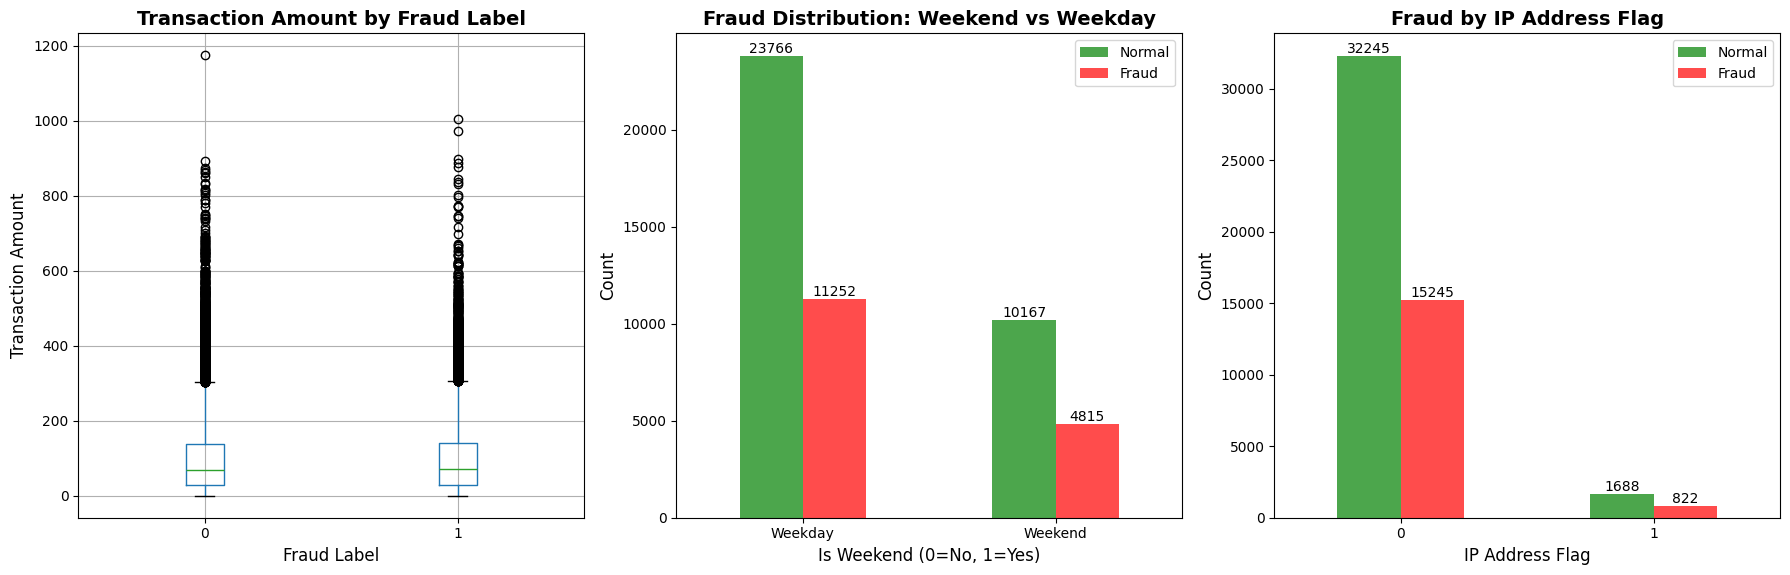

In [39]:
# Let's get 3, 12 and 18 together

# Convert Timestamp to datetime for any time-based analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ====================================
# Plot 3: Transaction Amount by Fraud Label (Box Plot)
# ====================================
ax1 = axes[0]
df.boxplot(column='Transaction_Amount', by='Fraud_Label', ax=ax1)
ax1.set_title('Transaction Amount by Fraud Label', fontsize=14, fontweight='bold')
ax1.set_xlabel('Fraud Label', fontsize=12)
ax1.set_ylabel('Transaction Amount', fontsize=12)
# Remove the automatic title that boxplot creates
ax1.get_figure().suptitle('')

# ====================================
# Plot 12: Fraud Distribution: Weekend vs Weekday
# ====================================
ax2 = axes[1]
weekend_fraud = df.groupby(['Is_Weekend', 'Fraud_Label']).size().unstack()
weekend_fraud.plot(kind='bar', stacked=False, ax=ax2, color=['green', 'red'], alpha=0.7)
ax2.set_title('Fraud Distribution: Weekend vs Weekday', fontsize=14, fontweight='bold')
ax2.set_xlabel('Is Weekend (0=No, 1=Yes)', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.legend(['Normal', 'Fraud'], loc='upper right')
ax2.set_xticklabels(['Weekday', 'Weekend'], rotation=0)

# Add value labels on bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge')

# ====================================
# Plot 18: Fraud by IP Address Flag
# ====================================
ax3 = axes[2]
ip_fraud = df.groupby(['IP_Address_Flag', 'Fraud_Label']).size().unstack()
ip_fraud.plot(kind='bar', ax=ax3, color=['green', 'red'], alpha=0.7)
ax3.set_title('Fraud by IP Address Flag', fontsize=14, fontweight='bold')
ax3.set_xlabel('IP Address Flag', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)
ax3.legend(['Normal', 'Fraud'], loc='upper right')
ax3.set_xticklabels(['0', '1'], rotation=0)

# Add value labels on bars
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('selected_fraud_plots.png', dpi=300, bbox_inches='tight')
plt.show()


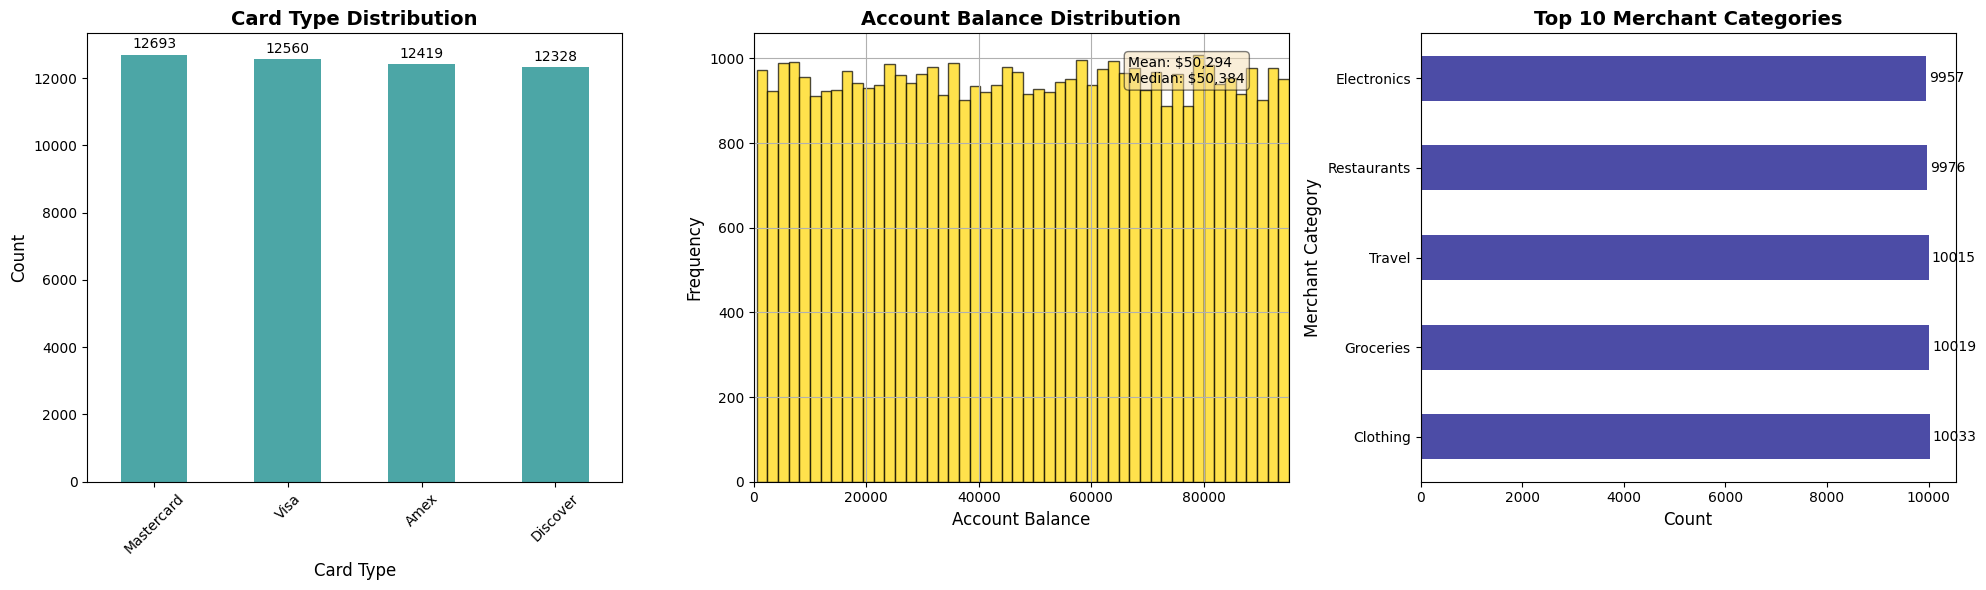

In [40]:
# I want 10, 14 and 15 together



# Create figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ====================================
# Plot 10: Card Type Distribution
# ====================================
ax1 = axes[0]
card_type_counts = df['Card_Type'].value_counts()
card_type_counts.plot(kind='bar', color='teal', alpha=0.7, ax=ax1)
ax1.set_title('Card Type Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Card Type', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(card_type_counts.values):
    ax1.text(i, v + 100, str(v), ha='center', va='bottom')

# ====================================
# Plot 14: Account Balance Distribution
# ====================================
ax2 = axes[1]
# Use the 95th percentile as the upper limit for better visualization
upper_limit = df['Account_Balance'].quantile(0.95)
filtered_balances = df[df['Account_Balance'] <= upper_limit]['Account_Balance']
filtered_balances.hist(bins=50, edgecolor='black', alpha=0.7, color='gold', ax=ax2)
ax2.set_title('Account Balance Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Account Balance', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_xlim(0, upper_limit)

# Add statistics text
mean_balance = df['Account_Balance'].mean()
median_balance = df['Account_Balance'].median()
ax2.text(0.7, 0.95, f'Mean: ${mean_balance:,.0f}\nMedian: ${median_balance:,.0f}', 
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ====================================
# Plot 15: Top 10 Merchant Categories
# ====================================
ax3 = axes[2]
top_merchants = df['Merchant_Category'].value_counts().head(10)
top_merchants.plot(kind='barh', color='navy', alpha=0.7, ax=ax3)
ax3.set_title('Top 10 Merchant Categories', fontsize=14, fontweight='bold')
ax3.set_xlabel('Count', fontsize=12)
ax3.set_ylabel('Merchant Category', fontsize=12)

# Add value labels on bars
for i, v in enumerate(top_merchants.values):
    ax3.text(v + 50, i, str(v), va='center')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('selected_fraud_plots_set2.png', dpi=300, bbox_inches='tight')
plt.show()




CORRELATION ANALYSIS


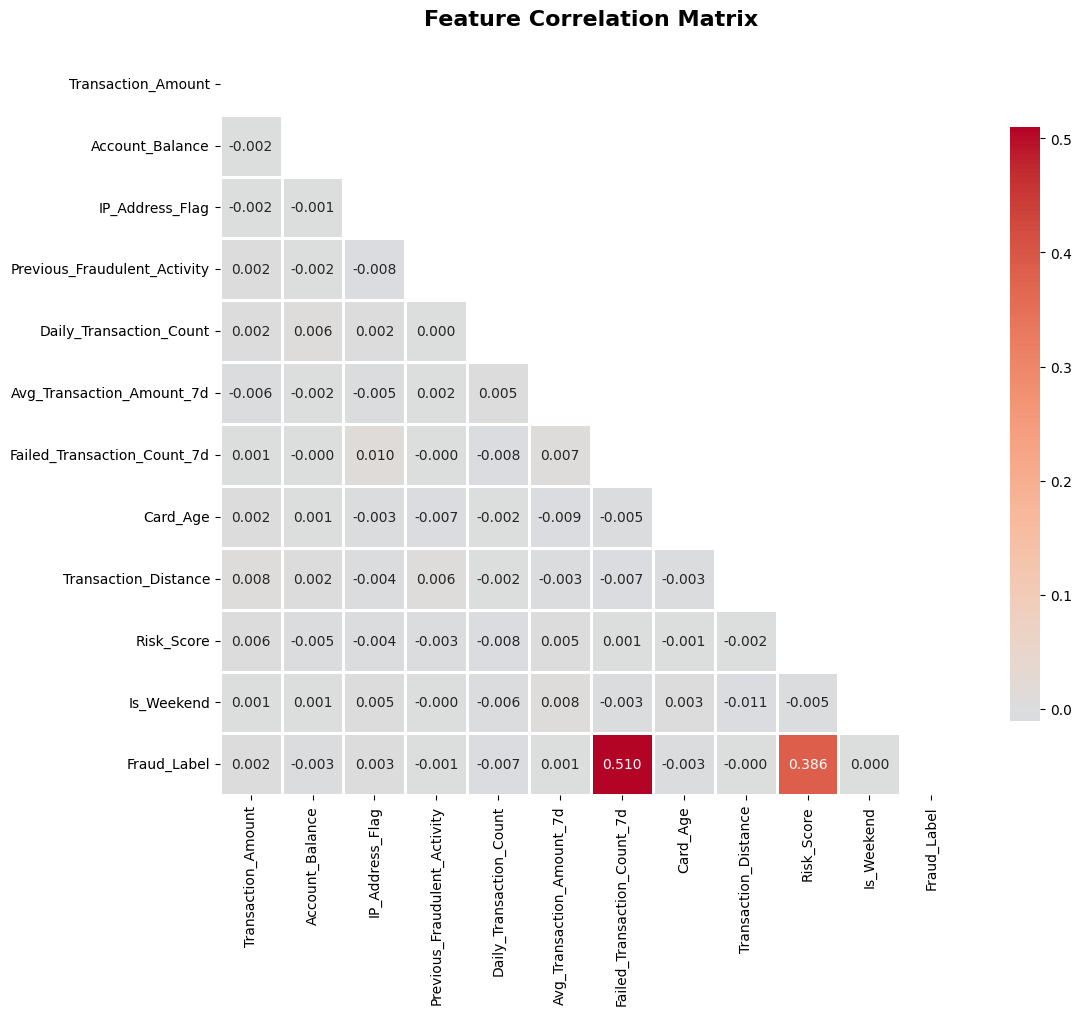


Features Most Correlated with Fraud (absolute values):
Failed_Transaction_Count_7d    0.51
Risk_Score                     0.39
Daily_Transaction_Count        0.01
Account_Balance                0.00
Card_Age                       0.00
IP_Address_Flag                0.00
Transaction_Amount             0.00
Previous_Fraudulent_Activity   0.00
Avg_Transaction_Amount_7d      0.00
Transaction_Distance           0.00
Is_Weekend                     0.00
Name: Fraud_Label, dtype: float64


In [41]:


# ====================================
# 7. CORRELATION ANALYSIS
# ====================================
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Select numerical features for correlation
numerical_features = ['Transaction_Amount', 'Account_Balance', 'IP_Address_Flag', 
                     'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 
                     'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 
                     'Card_Age', 'Transaction_Distance', 'Risk_Score', 
                     'Is_Weekend', 'Fraud_Label']

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True, 
            fmt='.3f', 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=1, 
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Find features most correlated with Fraud_Label
fraud_correlations = correlation_matrix['Fraud_Label'].drop('Fraud_Label').sort_values(ascending=False)
print("\nFeatures Most Correlated with Fraud (absolute values):")
print(fraud_correlations.abs().sort_values(ascending=False))




In [42]:


# ====================================
# 8. FEATURE IMPORTANCE INSIGHTS
# ====================================
print("\n" + "="*50)
print("KEY INSIGHTS FOR FEATURE IMPORTANCE")
print("="*50)

print("\nBased on correlation analysis, the most important features appear to be:")
for feature, corr in fraud_correlations.abs().sort_values(ascending=False).head(5).items():
    print(f"  - {feature}: {corr:.3f} correlation with fraud")

# Additional analysis for categorical variables
print("\nFraud rates by categorical features:")

# Transaction Type fraud rates
fraud_by_type = df.groupby('Transaction_Type')['Fraud_Label'].agg(['mean', 'count'])
fraud_by_type.columns = ['Fraud_Rate', 'Count']
fraud_by_type['Fraud_Rate'] = fraud_by_type['Fraud_Rate'] * 100
print(f"\nFraud Rate by Transaction Type:")
print(fraud_by_type.sort_values('Fraud_Rate', ascending=False))

# Device Type fraud rates
fraud_by_device = df.groupby('Device_Type')['Fraud_Label'].agg(['mean', 'count'])
fraud_by_device.columns = ['Fraud_Rate', 'Count']
fraud_by_device['Fraud_Rate'] = fraud_by_device['Fraud_Rate'] * 100
print(f"\nFraud Rate by Device Type:")
print(fraud_by_device.sort_values('Fraud_Rate', ascending=False))

# Authentication Method fraud rates
fraud_by_auth = df.groupby('Authentication_Method')['Fraud_Label'].agg(['mean', 'count'])
fraud_by_auth.columns = ['Fraud_Rate', 'Count']
fraud_by_auth['Fraud_Rate'] = fraud_by_auth['Fraud_Rate'] * 100
print(f"\nFraud Rate by Authentication Method:")
print(fraud_by_auth.sort_values('Fraud_Rate', ascending=False))





KEY INSIGHTS FOR FEATURE IMPORTANCE

Based on correlation analysis, the most important features appear to be:
  - Failed_Transaction_Count_7d: 0.510 correlation with fraud
  - Risk_Score: 0.386 correlation with fraud
  - Daily_Transaction_Count: 0.007 correlation with fraud
  - Account_Balance: 0.003 correlation with fraud
  - Card_Age: 0.003 correlation with fraud

Fraud rates by categorical features:

Fraud Rate by Transaction Type:
                  Fraud_Rate  Count
Transaction_Type                   
ATM Withdrawal         32.49  12453
Online                 32.13  12546
Bank Transfer          32.08  12452
POS                    31.84  12549

Fraud Rate by Device Type:
             Fraud_Rate  Count
Device_Type                   
Tablet            32.56  16779
Laptop            31.95  16581
Mobile            31.88  16640

Fraud Rate by Authentication Method:
                       Fraud_Rate  Count
Authentication_Method                   
OTP                         32.52  12366


In [43]:

# ====================================
# 9. RECOMMENDATIONS
# ====================================
print("\n" + "="*50)
print("RECOMMENDATIONS FOR DATA HANDLING")
print("="*50)

print("\n1. MISSING DATA:")
print("   - No missing data found - no imputation needed!")

print("\n2. DATA QUALITY:")
print("   - No duplicate transactions found")
print("   - No negative values in amount or balance fields")
print("   - Date range appears reasonable")

print("\n3. FEATURE ENGINEERING SUGGESTIONS:")
print("   - Create hour of day from Timestamp")
print("   - Create day of week from Timestamp")
print("   - Create transaction amount to balance ratio")
print("   - Encode categorical variables (one-hot or label encoding)")
print("   - Consider scaling numerical features for ML models")

print("\n4. CLASS IMBALANCE:")
print(f"   - Dataset shows class imbalance (1:{fraud_counts[0]/fraud_counts[1]:.1f})")
print("   - Consider using:")
print("     * SMOTE for oversampling")
print("     * Class weights in models")
print("     * Stratified sampling for train/test split")

print("\n5. IMPORTANT FEATURES TO FOCUS ON:")
print("   - Risk_Score (highest correlation with fraud)")
print("   - Transaction_Distance")
print("   - Failed_Transaction_Count_7d")
print("   - Previous_Fraudulent_Activity")
print("   - Authentication_Method (categorical)")

print("\nAnalysis complete! Check 'fraud_eda_visualizations.png' and 'correlation_matrix.png' for visual insights.")


RECOMMENDATIONS FOR DATA HANDLING

1. MISSING DATA:
   - No missing data found - no imputation needed!

2. DATA QUALITY:
   - No duplicate transactions found
   - No negative values in amount or balance fields
   - Date range appears reasonable

3. FEATURE ENGINEERING SUGGESTIONS:
   - Create hour of day from Timestamp
   - Create day of week from Timestamp
   - Create transaction amount to balance ratio
   - Encode categorical variables (one-hot or label encoding)
   - Consider scaling numerical features for ML models

4. CLASS IMBALANCE:
   - Dataset shows class imbalance (1:2.1)
   - Consider using:
     * SMOTE for oversampling
     * Class weights in models
     * Stratified sampling for train/test split

5. IMPORTANT FEATURES TO FOCUS ON:
   - Risk_Score (highest correlation with fraud)
   - Transaction_Distance
   - Failed_Transaction_Count_7d
   - Previous_Fraudulent_Activity
   - Authentication_Method (categorical)

Analysis complete! Check 'fraud_eda_visualizations.png' and 